# Import important Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats



# Load the dataset


In [6]:
Sales_data= pd.read_csv('/content/drive/MyDrive/CODSOFT/advertising.csv')


# Explore the dataset


In [7]:
Sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
Sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data Cleaning


In [10]:
Sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
Sales_data.duplicated().sum()

0

In [12]:
Sales_data=Sales_data.drop_duplicates()

In [13]:
Sales_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Removing outliers


In [14]:
z_score = stats.zscore(Sales_data[['TV', 'Radio', 'Newspaper', 'Sales']])
abs_score = abs(z_score)
filtered = (abs_score < 3).all(axis=1)
Sales_data = Sales_data[filtered]


In [15]:
Sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [16]:
Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   Radio      198 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      198 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


# Data Visualization


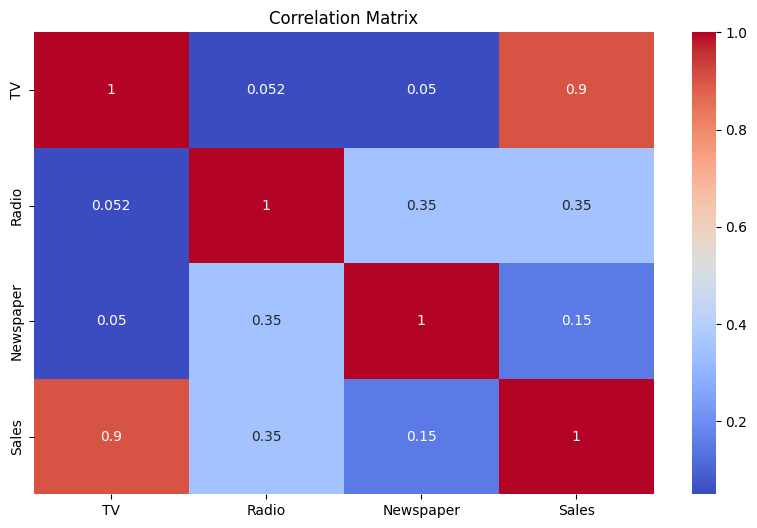

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(Sales_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



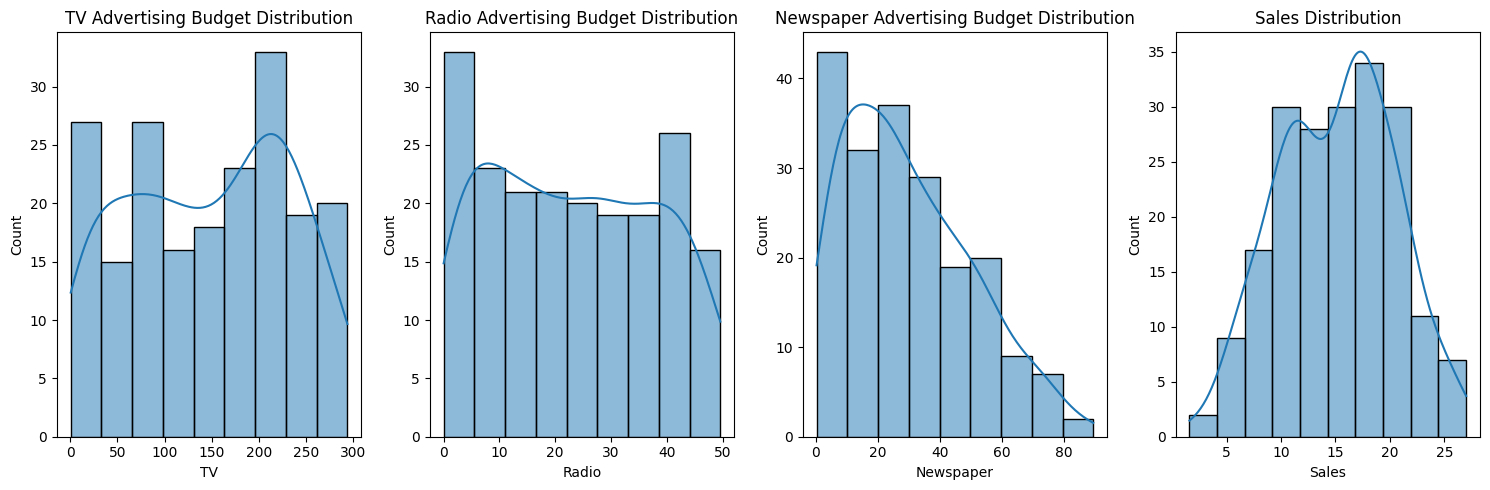

In [18]:

# Distribution of features
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.histplot(Sales_data['TV'], kde=True)
plt.title('TV Advertising Budget Distribution')

plt.subplot(1, 4, 2)
sns.histplot(Sales_data['Radio'], kde=True)
plt.title('Radio Advertising Budget Distribution')

plt.subplot(1, 4, 3)
sns.histplot(Sales_data['Newspaper'], kde=True)
plt.title('Newspaper Advertising Budget Distribution')

plt.subplot(1, 4, 4)
sns.histplot(Sales_data['Sales'], kde=True)
plt.title('Sales Distribution')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Newspaper vs Sales')

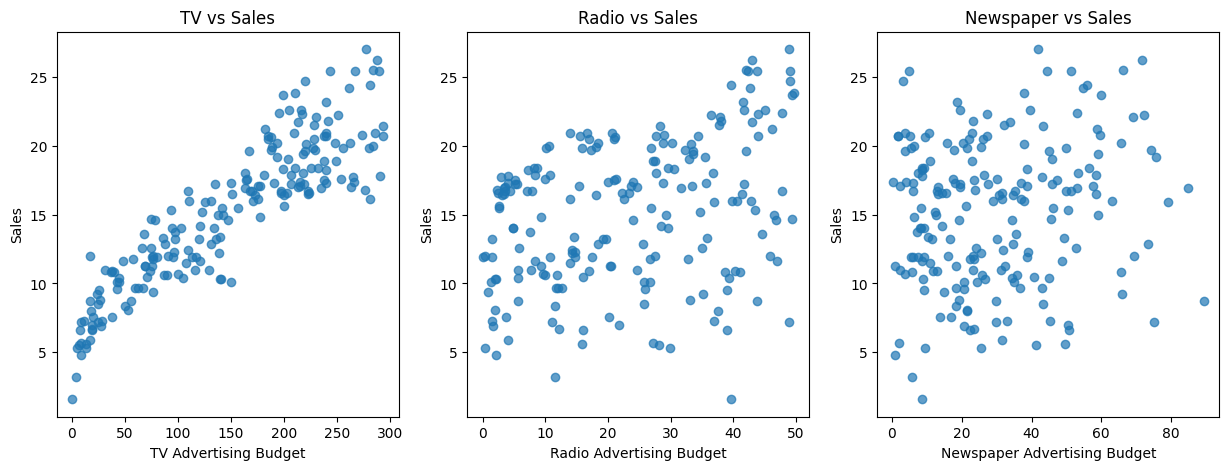

In [19]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(Sales_data['TV'], Sales_data['Sales'], alpha=0.7)
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('TV vs Sales')

plt.subplot(1, 3, 2)
plt.scatter(Sales_data['Radio'], Sales_data['Sales'], alpha=0.7)
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')
plt.title('Radio vs Sales')

plt.subplot(1, 3, 3)
plt.scatter(Sales_data['Newspaper'], Sales_data['Sales'], alpha=0.7)
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')



# Data Preprocessing


In [20]:
features = Sales_data[['TV', 'Radio', 'Newspaper']]
target = Sales_data['Sales']


In [21]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


# Split the data into training and testing sets


In [22]:
features_train, features_test, target_train, target_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


# Model Training

In [23]:
model = LinearRegression()
model.fit(features_train, target_train)


LinearRegression()

In [25]:
target_pred = model.predict(features_test)

# Model Evaluation


In [26]:
mse = mean_squared_error(target_test, target_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(target_test, target_pred)
r2 = r2_score(target_test, target_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")



Mean Squared Error (MSE): 2.4157289455935063
Root Mean Squared Error (RMSE): 1.5542615434969451
Mean Absolute Error (MAE): 1.2310754565160393
R^2 Score: 0.9130003152798274


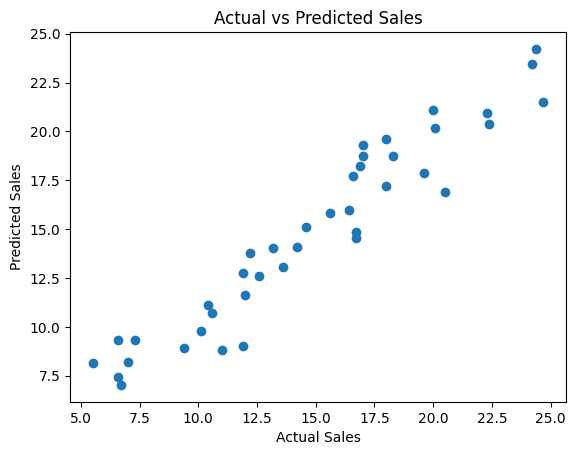

In [27]:
plt.scatter(target_test, target_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


# Predicting sales


In [28]:
tv_budget = 150.0
radio_budget = 25.0
newspaper_budget = 20.0

input_data = pd.DataFrame([[tv_budget, radio_budget, newspaper_budget]], columns=['TV', 'Radio', 'Newspaper'])

input_scaled = scaler.transform(input_data)

predicted_sales = model.predict(input_scaled)
print(f"Predicted Sales: {predicted_sales[0]}")

Predicted Sales: 15.392347895769104
